In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Skin_NonSkin.txt',sep='\t',names=['B','G','R','Skin or No-Skin'])

In [3]:
data.shape

(245057, 4)

In [4]:
data.head()

,B,G,R,Skin or No-Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
B                  245057 non-null int64
G                  245057 non-null int64
R                  245057 non-null int64
Skin or No-Skin    245057 non-null int64
dtypes: int64(4)
memory usage: 7.5 MB


In [6]:
data.describe()

,B,G,R,Skin or No-Skin
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


In [7]:
data[data['Skin or No-Skin']==2]

,B,G,R,Skin or No-Skin
50859,198,198,158,2
50860,198,198,158,2
50861,198,198,158,2
50862,198,198,158,2
50863,198,198,158,2
...,...,...,...,...
245052,163,162,112,2
245053,163,162,112,2
245054,163,162,112,2
245055,163,162,112,2


In [8]:
data.isnull().sum()

B                  0
G                  0
R                  0
Skin or No-Skin    0
dtype: int64

In [9]:
data['Skin or No-Skin'].value_counts()

2    194198
1     50859
Name: Skin or No-Skin, dtype: int64

In [10]:
data['Skin or No-Skin'].nunique()

2

In [28]:
skin=data['Skin or No-Skin'].value_counts()[1]
skin
no_skin=data['Skin or No-Skin'].value_counts()[2]
no_skin
sum=skin+no_skin
sum

245057

In [29]:
print('Skin Percentage: {}'.format(100*(skin/sum)))
print('No-Skin Percentage: {}'.format(100*(no_skin/sum)))

Skin Percentage: 20.753947040892527
No-Skin Percentage: 79.24605295910747


In [36]:
data['Skin or No-Skin'].replace(to_replace=2,value=0,inplace=True)

In [39]:
data.head()

,B,G,R,Skin or No-Skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


In [40]:
data['Skin or No-Skin'].value_counts()

0    194198
1     50859
Name: Skin or No-Skin, dtype: int64

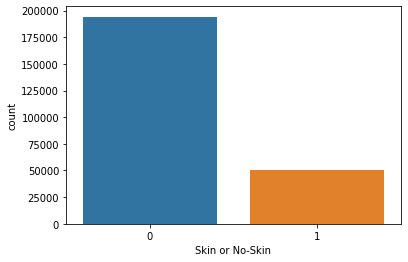

In [41]:
sns.countplot(x='Skin or No-Skin',data=data)

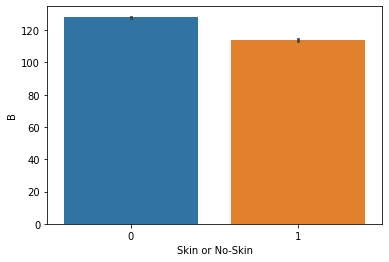

In [42]:
sns.barplot(x='Skin or No-Skin',y='B',data=data)

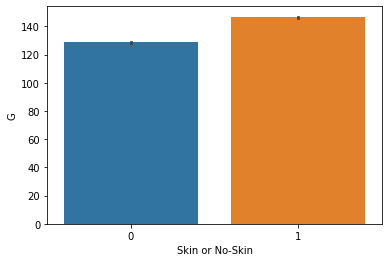

In [43]:
sns.barplot(x='Skin or No-Skin',y='G',data=data)

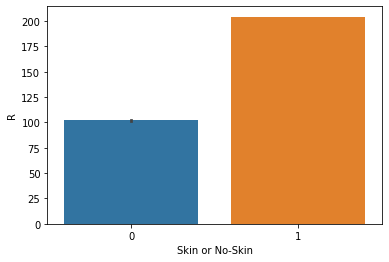

In [44]:
sns.barplot(x='Skin or No-Skin',y='R',data=data)

In [49]:
X=data[[ 'B','G','R']]
y=data['Skin or No-Skin']

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=30)

In [51]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs')

In [52]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred=log_reg.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
print('Accuracy is {0}%'.format(round(accuracy_score(y_test,pred)*100,3)))

Accuracy is 91.988%


In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     38867
           1       0.79      0.83      0.81     10145

    accuracy                           0.92     49012
   macro avg       0.87      0.89      0.88     49012
weighted avg       0.92      0.92      0.92     49012



In [62]:
print(confusion_matrix(y_test,pred))

[[36682  2185]
 [ 1742  8403]]


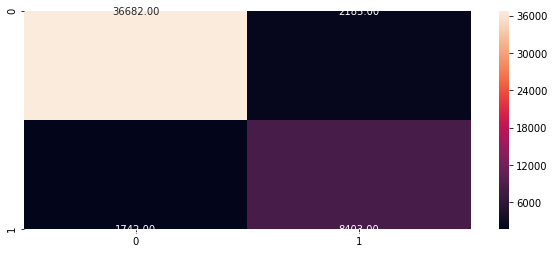

In [75]:
plt.figure(figsize=(10,4))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.2f',)

In [79]:
from sklearn.metrics import roc_curve, auc

In [80]:
# creating ROC curve of our test data
# To Do Replace 1,2,3,4
# 1 = Model name, 2 = train data, 3 = train label, 4 = test data
y_score = log_reg.fit(X_train,y_train).decision_function(X_test)

# fpr stands for false positive rate, and tpr stands for true positive rate.
#To do replace 5 with test label
fpr, tpr, thresholds = roc_curve(y_test, y_score)

AUC is 0.9516220263254362


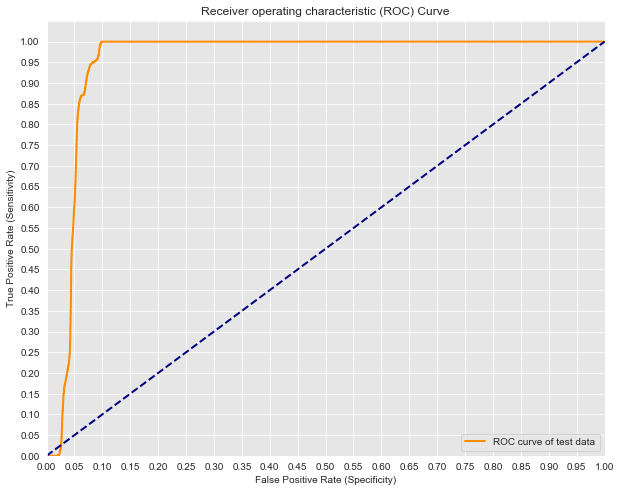

In [81]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# printing AUC info
print('AUC is {}'.format(auc(fpr, tpr)))

# plotting the tpr and fpr
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve of test data')

# aesthetics
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [83]:
scaled = MinMaxScaler()
x_scaled = scaled.fit_transform(data[['B','G','R']])

In [84]:
scale_train,scale_test,result_train,result_test = train_test_split(x_scaled,
                                                                  y,
                                                                  test_size = 0.2,
                                                                  random_state = 11)

In [89]:
log_reg.fit(scale_train,result_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
pred=log_reg.predict(scale_test)

In [91]:
print('Accuracy is {0}%'.format(round(accuracy_score(result_test,pred)*100,3)))

Accuracy is 92.098%
